<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/MS_spherical_DD_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# Truncation ordem
N1 = 3             # 1st domain

N2 = 3             # 2nd domain

# Map parameter

L0 = 1

# Collocation points

x0 = 0

r0 = L0*(1+x0)/(1-x0)   # r(x)

#x0 = (r0 - L0)/(r0 + L0)    # x(r)

r0_col = 1/(r0+L0) - (r0-L0)/(r0+L0)**2      # dx0/dr0
rr0_col = -2/(r0+L0)**2 + 2*(r0-L0)/(r0+L0)**3    # d²x0/dr0²

# 1st domain:
col_1 = np.cos(np.arange(2*N1 + 1)*math.pi /(2*N1))      # interface not included (verified)

x1_col = np.flip(col_1)

x1 = x1_col[N1:2*N1]

r1 = r0*x1                                    # physical domain (verified); x = r/r0

r1_col = 1/r0       # dx1/dr1

rr1_col = 0         # d^2 x1/dr1^2

# 2st domain:
col_2 = np.cos(np.arange(N2 + 2)*math.pi /(N2 + 1))      # interface not included (verified)

x2_col = np.flip(col_2)

x2 = x2_col[1:N2+1]

r2 = r0 + L0*(1+x2)/(1-x2)                    # physical domain (verified)

#x2 = (r2-r0-L0)/(r2-r0+L0)

r2_col =  1/(r2-r0+L0) - (r2-r0-L0)/(r2-r0+L0)**2   # dx2/dr2

rr2_col = -2/(r2-r0+L0)**2 + 2*(r2-r0-L0)/(r2-r0+L0)**3


r = np.hstack((r1,r2))                  # \phi^(1)(r0) = \phi^(2)(r0)

# Base Functions:

# 1st domain:

TB1 = np.zeros([2*N1+2,N1])

TB1[0,] = 1
TB1[1,] = x1

for i in range(2,2*N1+2):
  TB1[i,] = 2*x1*TB1[i-1,] - TB1[i-2,]

TB1_pair = TB1[0:2*N1+1:2,:]

# 1st Derivative
rTB1 = np.zeros([2*N1+2,N1])
colTB1 = np.zeros([2*N1+2,N1])

colTB1[0,] = 0
colTB1[1,] = 1
rTB1[0,] = r1_col*colTB1[0,]
rTB1[1,] = r1_col*colTB1[1,]

for i in range(2, 2*N1+2):
  colTB1[i,] = 2*x1*colTB1[i-1,] + 2*TB1[i-1,] - colTB1[i-2,]
  rTB1[i,] = r1_col*colTB1[i,]

rTB1_pair = rTB1[0:2*N1+1:2,:]     # Verified

# 2nd Derivative
rrTB1 = np.zeros([2*N1+2,N1])
ccolTB1 = np.zeros([2*N1+2,N1])

ccolTB1[0,] = 0
ccolTB1[1,] = 0
rrTB1[0,] = rr1_col*colTB1[0,] + (r1_col)**2 * ccolTB1[0,]
rrTB1[1,] = rr1_col*colTB1[1,] + (r1_col)**2 * ccolTB1[1,]

for i in range(2, 2*N1+2):
  ccolTB1[i,] = 2*colTB1[i-1,] + 2*x1*ccolTB1[i-1,] + 2*colTB1[i-1,] - ccolTB1[i-2,]
  rrTB1[i,] = rr1_col*colTB1[i,] + (r1_col)**2 * ccolTB1[i,]                         # ccolTB1[i,] = d²TB1[i,]/dcol²

rrTB1_pair = rrTB1[0:2*N1+1:2,:]

# Basis function for 1st domain:
psi_1 = np.hstack((TB1_pair,np.zeros([N1+1,N1])))   # [N1+1, N1+N2+2]      # Verified

rpsi_1 = np.hstack((rTB1_pair,np.zeros([N1+1,N1])))   #     # Verified

rrpsi_1 = np.hstack((rrTB1_pair,np.zeros([N1+1,N1])))   #     # Verified

# Second domain:

TL2 = np.zeros([N2+2,N2])

TL2[0,] = 1
TL2[1,] = x2

for i in range(2,N2+2):
  TL2[i,] = 2*x2*TL2[i-1,] - TL2[i-2,]

# 1st Derivative
rTL2 = np.zeros([N2+2,N2])
colTL2 = np.zeros([N2+2,N2])

colTL2[0,] = 0
colTL2[1,] = 1
rTL2[0,] = r2_col*colTL2[0,]
rTL2[1,] = r2_col*colTL2[1,]

for i in range(2, N2+2):
  colTL2[i,] = 2*x2*colTL2[i-1,] + 2*TL2[i-1,] - colTL2[i-2,]
  rTL2[i,] = r2_col*colTL2[i,]

# 2nd Derivative
rrTL2 = np.zeros([N2+2,N2])
ccolTL2 = np.zeros([N2+2,N2])

ccolTL2[0,] = 0
ccolTL2[1,] = 0
rrTL2[0,] = rr2_col*colTL2[0,] + (r2_col)**2 * ccolTL2[0,]
rrTL2[1,] = rr2_col*colTL2[1,] + (r2_col)**2 * ccolTL2[1,]

for i in range(2, N2+2):
  ccolTL2[i,] = 2*colTL2[i-1,] + 2*x2*ccolTL2[i-1,] + 2*colTL2[i-1,] - ccolTL2[i-2,]
  rrTL2[i,] = rr2_col*colTL2[i,] + (r2_col)**2 * ccolTL2[i,]                         # ccolTL2[i,] = d²TL2[i,]/dcol²

# Linear combinations of TL2, rTL2 and rrTL2
SB2 = 1/2*(TL2[1:N2+2,:] - TL2[0:N2+1,:])
rSB2 = 1/2*(rTL2[1:N2+2,:] - rTL2[0:N2+1,:])
rrSB2 = 1/2*(rrTL2[1:N2+2,:] - rrTL2[0:N2+1,:])



# Basis function for 2st domain:
psi_2 = np.hstack((np.zeros([N2+1,N2]), SB2))

rpsi_2 = np.hstack((np.zeros([N2+1,N2]), rSB2))

rrpsi_2 = np.hstack((np.zeros([N2+1,N2]), rrSB2))


# Final Base function: 1 + 2 Subdomains - Interface not included
psi_tst = np.vstack((psi_1, psi_2))         # Verified

rpsi_tst = np.vstack((rpsi_1, rpsi_2))      # Verified

rrpsi_tst = np.vstack((rrpsi_1, rrpsi_2))    # Verified



# TRANSMISSION CONDITIONS:

# 1st domain
TB1_r0 = np.zeros([2*N1+2])     # TB1(r0)

TB1_r0[0] = 1
TB1_r0[1] = r0

for i in range(2,2*N1+2):
  TB1_r0[i] = 2*r0*TB1_r0[i-1] - TB1_r0[i-2]

TB1_r0_pair = TB1_r0[0:2*N1+1:2]

# 1st Derivative
rTB1_r0 = np.zeros([2*N1+2])
#colTB1_r0 = np.zeros([2*N1+2])

#colTB1_r0[0] = 0
#colTB1_r0[1] = 1
#rTB1_r0[0] = r0_col*colTB1_r0[0]
#rTB1_r0[1] = r0_col*colTB1_r0[1]
rTB1_r0[0] = 0
rTB1_r0[1] = 1

for i in range(2, 2*N1+2):
  rTB1_r0[i] = 2*r0*rTB1_r0[i-1] + 2*TB1_r0[i-1] - rTB1_r0[i-2]
#  rTB1_r0[i] = r0_col*colTB1_r0[i]

rTB1_r0_pair = rTB1_r0[0:2*N1+1:2]     # Verified

#psi_1_cc = np.hstack((np.ones(N1),TB1_r0_pair))   # [N1+1, N1+N2+2]      # Verified
#psi_2_cc

# 2nd domain

TL2_r0 = np.zeros([N2+2])     # TL2(r0)

TL2_r0[0] = 1
TL2_r0[1] = r0

for i in range(2,N2+2):
  TL2_r0[i] = 2*r0*TL2_r0[i-1] - TL2_r0[i-2]

# Derivative
rTL2_r0 = np.zeros([N2+2])
#colTL2_r0 = np.zeros([N2+2])

#colTL2_r0[0] = 0
#colTL2_r0[1] = 1
#rTL2_r0[0] = r0_col*colTL2_r0[0]
#rTL2_r0[1] = r0_col*colTL2_r0[1]
rTL2_r0[0] = 0
rTL2_r0[1] = 1

for i in range(2, N2+2):
  #colTL2_r0[i] = 2*x0*colTL2_r0[i-1] + 2*TL2_r0[i-1] - colTL2_r0[i-2]
  rTL2_r0[i] =  2*r0*rTL2_r0[i-1] + 2*TL2_r0[i-1] - rTL2_r0[i-2]

SB2_r0 = 1/2*(TL2_r0[1:N2+2] - TL2_r0[0:N2+1])
rSB2_r0 = 1/2*(rTL2_r0[1:N2+2] - rTL2_r0[0:N2+1])
#rrSB2_r0 = 1/2*(rrTL2_r0[1:N2+2] - rrTL2_r0[0:N2+1])


psi_cc = np.hstack((TB1_r0_pair, - SB2_r0))         # psi_1(r0) - psi_2(r0) => phi_1(r0) - phi_2(r0)
rpsi_cc = np.hstack((rTB1_r0_pair, - rSB2_r0))         # rpsi_1(r0) - rpsi_2(r0) => rphi_1(r0) - rphi_2(r0)

CC = np.vstack((psi_cc, rpsi_cc))
#rCC = np.vstack((rpsi_cc, rrpsi_cc))


# Final Base functions:
psi = np.hstack((psi_tst, CC.T))
#rpsi = np.hstack((rpsi_tst, rCC.T))



In [43]:
# Field Functions:

# Initial conditions of Phi (Scalar field):

sigma = 1

A0 = 0.05   # 0.085 -> disperses ;

Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

Phi_0 = np.hstack((Phi_init, np.zeros(2)))

inv_psi = np.linalg.pinv(psi) # Pseudoinversa (SVD)

a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)

Phi = np.dot(a0, psi)


In [44]:
r.shape

(6,)

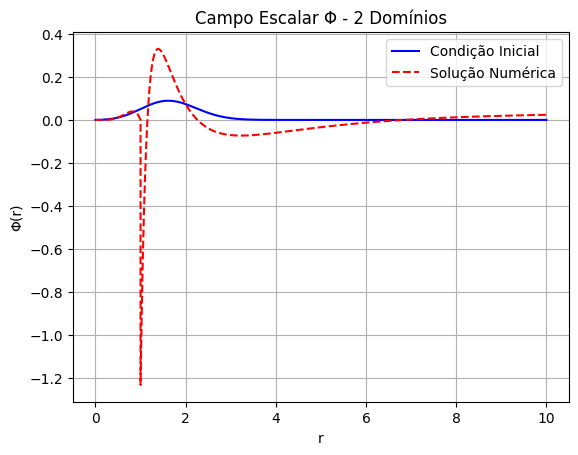

In [48]:

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot1 = np.linspace(0, 1, M//2)      # Primeiro domínio (0, L0]
rplot2 = np.linspace(r0, 10, M//2)            # Segundo domínio  [L0, ∞)

rplot = np.hstack((rplot1, rplot2))
#rplot = np.linspace(0.000001, 10, M)
# Mapeamento para cada domínio
colplot1 = rplot1/r0
colplot2 = (rplot2 - r0 - L0)/(rplot2 - r0 + L0)

TB1_plot = np.zeros([2*N1+2,len(rplot1)])
TB1_plot[0,] = 1
TB1_plot[1,] = colplot1

for i in range(2,2*N1+2):
  TB1_plot[i,] = 2*colplot1*TB1_plot[i-1,] - TB1_plot[i-2,]

TB1_pair_plot = TB1_plot[0:2*N1+1:2,:]

psiplot_1 = np.hstack((TB1_pair_plot,np.zeros([N1+1,len(rplot1)])))   # [N1+1, N1+N2+2]      # Verified

TL2_plot = np.zeros([N2+2,len(rplot2)])

TL2_plot[0,] = 1
TL2_plot[1,] = colplot2

for i in range(2,N2+2):
  TL2_plot[i,] = 2*colplot2*TL2_plot[i-1,] - TL2_plot[i-2,]

SB2_plot = 1/2*(TL2_plot[1:N2+2,:] - TL2_plot[0:N2+1,:])

psiplot_2 = np.hstack((np.zeros([N2+1,len(rplot2)]), SB2_plot))

psiplot_tst = np.vstack((psiplot_1, psiplot_2))

psiplot = np.hstack((psiplot_tst, CC.T))

Phiplot = np.dot(a0, psiplot)

Phi_init0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))

Phiplot_0 = np.hstack((Phi_init0, np.zeros(2)))

erro = abs(Phiplot_0 - Phiplot)

plt.plot(rplot, Phi_init0, 'b-', label='Condição Inicial')
plt.plot(rplot, Phiplot[:M], 'r--', label='Solução Numérica')  # Assegurar mesma dimensão
plt.xlabel('r')
plt.ylabel('Φ(r)')
plt.title('Campo Escalar Φ - 2 Domínios')
plt.legend()
plt.grid(True)
plt.show()




In [47]:
colplot2

array([-1.        , -0.98806366, -0.97626895, ...,  0.79975955,
        0.79987985,  0.8       ])

In [28]:
np.shape(CC.T)

(8, 2)

In [ ]:
rplot

array([1.00000000e-06, 3.33322226e-03, 6.66544452e-03, ...,
       9.99333556e+00, 9.99666778e+00, 1.00000000e+01])

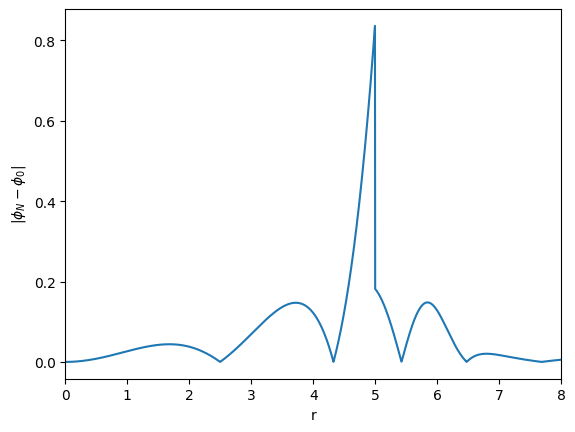

In [ ]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [ ]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001

Chi=np.dot(c0,psi)
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-40    # tolerance

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


0.0010002211192540779 2.389578878297757e-07 2.125579119457971e-08 2.9529959996231994e-09 4.0480898191578476e-10 5.186479048655372e-11 6.558160686940859e-12 8.278920357408913e-13 1.0449009293670647e-13 1.3187559133373606e-14 1.6643786717037864e-15 2.1005824037344244e-16 2.651109242594875e-17 3.345900413306606e-18 4.2228875889272745e-19 5.322234738803665e-20 6.839265758592374e-21 8.153415143052156e-22 1.358385630622489e-22 

Field equations

In [ ]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)



Quadrature Integration

In [ ]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2

#Alpha_0 = 1 + np.dot(al0, psi_0)

In [ ]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It)

t = 0


Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []


V = 0

while t <= tf:

  # First step
  Phi = np.dot(a0, psi)
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)
  Pi = np.dot(b0, psi)
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi)
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi)
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC

  # L2-error associated to the momentum constraint
  rqKrr = np.dot(ck0, rqSB1)
  M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
  L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC

  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))
#  print(Alpha_origin)

  # Phi origin:
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)

  # Second step
  Phi = np.dot(a0 + L1/2, psi)
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)

  # Forth step
  Phi = np.dot(a0 + L3, psi)
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)

  t = t + h
  print(t)

#  if t > 9:
#    h=0.0001


  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)


t1 = np.linspace(0, tf, len(Alpha_origin))




0.0002
0.0004
0.0006000000000000001
0.0008
0.001
0.0012000000000000001
0.0014000000000000002
0.0016000000000000003
0.0018000000000000004
0.0020000000000000005
0.0022000000000000006
0.0024000000000000007
0.0026000000000000007
0.002800000000000001
0.003000000000000001
0.003200000000000001
0.003400000000000001
0.003600000000000001
0.0038000000000000013
0.004000000000000001
0.004200000000000001
0.0044
0.0046
0.0048
0.004999999999999999
0.005199999999999999
0.0053999999999999986
0.005599999999999998
0.005799999999999998
0.0059999999999999975
0.006199999999999997
0.006399999999999997
0.0065999999999999965
0.006799999999999996
0.006999999999999996
0.0071999999999999955
0.007399999999999995
0.007599999999999995
0.0077999999999999944
0.007999999999999995
0.008199999999999995
0.008399999999999996
0.008599999999999997
0.008799999999999997
0.008999999999999998
0.009199999999999998
0.009399999999999999
0.0096
0.0098
0.01
0.0102
0.010400000000000001
0.010600000000000002
0.010800000000000002
0.011000

0.08280000000000032
0.08300000000000032
0.08320000000000033
0.08340000000000033
0.08360000000000034
0.08380000000000035
0.08400000000000035
0.08420000000000036
0.08440000000000036
0.08460000000000037
0.08480000000000038
0.08500000000000038
0.08520000000000039
0.08540000000000039
0.0856000000000004
0.0858000000000004
0.08600000000000041
0.08620000000000042
0.08640000000000042
0.08660000000000043
0.08680000000000043
0.08700000000000044
0.08720000000000044
0.08740000000000045
0.08760000000000046
0.08780000000000046
0.08800000000000047
0.08820000000000047
0.08840000000000048
0.08860000000000048
0.08880000000000049
0.0890000000000005
0.0892000000000005
0.0894000000000005
0.08960000000000051
0.08980000000000052
0.09000000000000052
0.09020000000000053
0.09040000000000054
0.09060000000000054
0.09080000000000055
0.09100000000000055
0.09120000000000056
0.09140000000000056
0.09160000000000057
0.09180000000000058
0.09200000000000058
0.09220000000000059
0.09240000000000059
0.0926000000000006
0.0928

0.1658000000000027
0.1660000000000027
0.1662000000000027
0.1664000000000027
0.16660000000000272
0.16680000000000272
0.16700000000000273
0.16720000000000274
0.16740000000000274
0.16760000000000275
0.16780000000000275
0.16800000000000276
0.16820000000000276
0.16840000000000277
0.16860000000000278
0.16880000000000278
0.1690000000000028
0.1692000000000028
0.1694000000000028
0.1696000000000028
0.1698000000000028
0.17000000000000282
0.17020000000000282
0.17040000000000283
0.17060000000000283
0.17080000000000284
0.17100000000000284
0.17120000000000285
0.17140000000000286
0.17160000000000286
0.17180000000000287
0.17200000000000287
0.17220000000000288
0.17240000000000288
0.1726000000000029
0.1728000000000029
0.1730000000000029
0.1732000000000029
0.1734000000000029
0.17360000000000292
0.17380000000000292
0.17400000000000293
0.17420000000000294
0.17440000000000294
0.17460000000000295
0.17480000000000295
0.17500000000000296
0.17520000000000296
0.17540000000000297
0.17560000000000298
0.175800000000

0.2498000000000051
0.2500000000000051
0.2502000000000051
0.25040000000000506
0.25060000000000504
0.250800000000005
0.251000000000005
0.251200000000005
0.25140000000000495
0.25160000000000493
0.2518000000000049
0.2520000000000049
0.25220000000000486
0.25240000000000484
0.2526000000000048
0.2528000000000048
0.2530000000000048
0.25320000000000475
0.25340000000000473
0.2536000000000047
0.2538000000000047
0.25400000000000467
0.25420000000000464
0.2544000000000046
0.2546000000000046
0.2548000000000046
0.25500000000000456
0.25520000000000453
0.2554000000000045
0.2556000000000045
0.25580000000000447
0.25600000000000445
0.2562000000000044
0.2564000000000044
0.2566000000000044
0.25680000000000436
0.25700000000000434
0.2572000000000043
0.2574000000000043
0.25760000000000427
0.25780000000000425
0.2580000000000042
0.2582000000000042
0.2584000000000042
0.25860000000000416
0.25880000000000414
0.2590000000000041
0.2592000000000041
0.25940000000000407
0.25960000000000405
0.259800000000004
0.26000000000

0.33499999999999575
0.3351999999999957
0.3353999999999957
0.3355999999999957
0.33579999999999566
0.33599999999999564
0.3361999999999956
0.3363999999999956
0.33659999999999557
0.33679999999999555
0.3369999999999955
0.3371999999999955
0.3373999999999955
0.33759999999999546
0.33779999999999544
0.3379999999999954
0.3381999999999954
0.33839999999999537
0.33859999999999535
0.3387999999999953
0.3389999999999953
0.3391999999999953
0.33939999999999526
0.33959999999999524
0.3397999999999952
0.3399999999999952
0.3401999999999952
0.34039999999999515
0.34059999999999513
0.3407999999999951
0.3409999999999951
0.34119999999999506
0.34139999999999504
0.341599999999995
0.341799999999995
0.341999999999995
0.34219999999999495
0.34239999999999493
0.3425999999999949
0.3427999999999949
0.34299999999999486
0.34319999999999484
0.3433999999999948
0.3435999999999948
0.3437999999999948
0.34399999999999475
0.34419999999999473
0.3443999999999947
0.3445999999999947
0.34479999999999467
0.34499999999999464
0.345199999

0.42039999999998634
0.4205999999999863
0.4207999999999863
0.4209999999999863
0.42119999999998625
0.42139999999998623
0.4215999999999862
0.4217999999999862
0.42199999999998616
0.42219999999998614
0.4223999999999861
0.4225999999999861
0.4227999999999861
0.42299999999998605
0.42319999999998603
0.423399999999986
0.423599999999986
0.42379999999998597
0.42399999999998594
0.4241999999999859
0.4243999999999859
0.4245999999999859
0.42479999999998586
0.42499999999998583
0.4251999999999858
0.4253999999999858
0.42559999999998577
0.42579999999998575
0.4259999999999857
0.4261999999999857
0.4263999999999857
0.42659999999998566
0.42679999999998564
0.4269999999999856
0.4271999999999856
0.42739999999998557
0.42759999999998555
0.4277999999999855
0.4279999999999855
0.4281999999999855
0.42839999999998546
0.42859999999998544
0.4287999999999854
0.4289999999999854
0.42919999999998537
0.42939999999998535
0.4295999999999853
0.4297999999999853
0.4299999999999853
0.43019999999998526
0.43039999999998524
0.43059999

0.5057999999999769
0.5059999999999769
0.5061999999999769
0.5063999999999769
0.5065999999999768
0.5067999999999768
0.5069999999999768
0.5071999999999768
0.5073999999999768
0.5075999999999767
0.5077999999999767
0.5079999999999767
0.5081999999999767
0.5083999999999766
0.5085999999999766
0.5087999999999766
0.5089999999999766
0.5091999999999766
0.5093999999999765
0.5095999999999765
0.5097999999999765
0.5099999999999765
0.5101999999999765
0.5103999999999764
0.5105999999999764
0.5107999999999764
0.5109999999999764
0.5111999999999763
0.5113999999999763
0.5115999999999763
0.5117999999999763
0.5119999999999763
0.5121999999999762
0.5123999999999762
0.5125999999999762
0.5127999999999762
0.5129999999999761
0.5131999999999761
0.5133999999999761
0.5135999999999761
0.513799999999976
0.513999999999976
0.514199999999976
0.514399999999976
0.514599999999976
0.5147999999999759
0.5149999999999759
0.5151999999999759
0.5153999999999759
0.5155999999999759
0.5157999999999758
0.5159999999999758
0.516199999999975

0.5931999999999673
0.5933999999999673
0.5935999999999673
0.5937999999999672
0.5939999999999672
0.5941999999999672
0.5943999999999672
0.5945999999999672
0.5947999999999671
0.5949999999999671
0.5951999999999671
0.5953999999999671
0.595599999999967
0.595799999999967
0.595999999999967
0.596199999999967
0.596399999999967
0.5965999999999669
0.5967999999999669
0.5969999999999669
0.5971999999999669
0.5973999999999668
0.5975999999999668
0.5977999999999668
0.5979999999999668
0.5981999999999668
0.5983999999999667
0.5985999999999667
0.5987999999999667
0.5989999999999667
0.5991999999999666
0.5993999999999666
0.5995999999999666
0.5997999999999666
0.5999999999999666
0.6001999999999665
0.6003999999999665
0.6005999999999665
0.6007999999999665
0.6009999999999664
0.6011999999999664
0.6013999999999664
0.6015999999999664
0.6017999999999664
0.6019999999999663
0.6021999999999663
0.6023999999999663
0.6025999999999663
0.6027999999999663
0.6029999999999662
0.6031999999999662
0.6033999999999662
0.603599999999966

0.6807999999999577
0.6809999999999576
0.6811999999999576
0.6813999999999576
0.6815999999999576
0.6817999999999576
0.6819999999999575
0.6821999999999575
0.6823999999999575
0.6825999999999575
0.6827999999999574
0.6829999999999574
0.6831999999999574
0.6833999999999574
0.6835999999999574
0.6837999999999573
0.6839999999999573
0.6841999999999573
0.6843999999999573
0.6845999999999572
0.6847999999999572
0.6849999999999572
0.6851999999999572
0.6853999999999572
0.6855999999999571
0.6857999999999571
0.6859999999999571
0.6861999999999571
0.686399999999957
0.686599999999957
0.686799999999957
0.686999999999957
0.687199999999957
0.6873999999999569
0.6875999999999569
0.6877999999999569
0.6879999999999569
0.6881999999999568
0.6883999999999568
0.6885999999999568
0.6887999999999568
0.6889999999999568
0.6891999999999567
0.6893999999999567
0.6895999999999567
0.6897999999999567
0.6899999999999566
0.6901999999999566
0.6903999999999566
0.6905999999999566
0.6907999999999566
0.6909999999999565
0.691199999999956

0.768199999999948
0.768399999999948
0.768599999999948
0.768799999999948
0.768999999999948
0.7691999999999479
0.7693999999999479
0.7695999999999479
0.7697999999999479
0.7699999999999478
0.7701999999999478
0.7703999999999478
0.7705999999999478
0.7707999999999477
0.7709999999999477
0.7711999999999477
0.7713999999999477
0.7715999999999477
0.7717999999999476
0.7719999999999476
0.7721999999999476
0.7723999999999476
0.7725999999999476
0.7727999999999475
0.7729999999999475
0.7731999999999475
0.7733999999999475
0.7735999999999474
0.7737999999999474
0.7739999999999474
0.7741999999999474
0.7743999999999474
0.7745999999999473
0.7747999999999473
0.7749999999999473
0.7751999999999473
0.7753999999999472
0.7755999999999472
0.7757999999999472
0.7759999999999472
0.7761999999999472
0.7763999999999471
0.7765999999999471
0.7767999999999471
0.7769999999999471
0.777199999999947
0.777399999999947
0.777599999999947
0.777799999999947
0.777999999999947
0.7781999999999469
0.7783999999999469
0.7785999999999469
0.7

0.8559999999999384
0.8561999999999383
0.8563999999999383
0.8565999999999383
0.8567999999999383
0.8569999999999383
0.8571999999999382
0.8573999999999382
0.8575999999999382
0.8577999999999382
0.8579999999999381
0.8581999999999381
0.8583999999999381
0.8585999999999381
0.8587999999999381
0.858999999999938
0.859199999999938
0.859399999999938
0.859599999999938
0.859799999999938
0.8599999999999379
0.8601999999999379
0.8603999999999379
0.8605999999999379
0.8607999999999378
0.8609999999999378
0.8611999999999378
0.8613999999999378
0.8615999999999377
0.8617999999999377
0.8619999999999377
0.8621999999999377
0.8623999999999377
0.8625999999999376
0.8627999999999376
0.8629999999999376
0.8631999999999376
0.8633999999999376
0.8635999999999375
0.8637999999999375
0.8639999999999375
0.8641999999999375
0.8643999999999374
0.8645999999999374
0.8647999999999374
0.8649999999999374
0.8651999999999374
0.8653999999999373
0.8655999999999373
0.8657999999999373
0.8659999999999373
0.8661999999999372
0.866399999999937

0.9433999999999287
0.9435999999999287
0.9437999999999287
0.9439999999999287
0.9441999999999287
0.9443999999999286
0.9445999999999286
0.9447999999999286
0.9449999999999286
0.9451999999999285
0.9453999999999285
0.9455999999999285
0.9457999999999285
0.9459999999999285
0.9461999999999284
0.9463999999999284
0.9465999999999284
0.9467999999999284
0.9469999999999283
0.9471999999999283
0.9473999999999283
0.9475999999999283
0.9477999999999283
0.9479999999999282
0.9481999999999282
0.9483999999999282
0.9485999999999282
0.9487999999999281
0.9489999999999281
0.9491999999999281
0.9493999999999281
0.9495999999999281
0.949799999999928
0.949999999999928
0.950199999999928
0.950399999999928
0.950599999999928
0.9507999999999279
0.9509999999999279
0.9511999999999279
0.9513999999999279
0.9515999999999278
0.9517999999999278
0.9519999999999278
0.9521999999999278
0.9523999999999277
0.9525999999999277
0.9527999999999277
0.9529999999999277
0.9531999999999277
0.9533999999999276
0.9535999999999276
0.953799999999927

1.0303999999999192
1.0305999999999191
1.0307999999999191
1.030999999999919
1.031199999999919
1.031399999999919
1.031599999999919
1.031799999999919
1.031999999999919
1.032199999999919
1.032399999999919
1.032599999999919
1.032799999999919
1.0329999999999189
1.0331999999999188
1.0333999999999188
1.0335999999999188
1.0337999999999188
1.0339999999999188
1.0341999999999187
1.0343999999999187
1.0345999999999187
1.0347999999999187
1.0349999999999187
1.0351999999999186
1.0353999999999186
1.0355999999999186
1.0357999999999186
1.0359999999999185
1.0361999999999185
1.0363999999999185
1.0365999999999185
1.0367999999999185
1.0369999999999184
1.0371999999999184
1.0373999999999184
1.0375999999999184
1.0377999999999183
1.0379999999999183
1.0381999999999183
1.0383999999999183
1.0385999999999183
1.0387999999999182
1.0389999999999182
1.0391999999999182
1.0393999999999182
1.0395999999999181
1.0397999999999181
1.039999999999918
1.040199999999918
1.040399999999918
1.040599999999918
1.040799999999918
1.040999

1.1183999999999095
1.1185999999999094
1.1187999999999094
1.1189999999999094
1.1191999999999094
1.1193999999999094
1.1195999999999093
1.1197999999999093
1.1199999999999093
1.1201999999999093
1.1203999999999092
1.1205999999999092
1.1207999999999092
1.1209999999999092
1.1211999999999092
1.1213999999999091
1.1215999999999091
1.121799999999909
1.121999999999909
1.122199999999909
1.122399999999909
1.122599999999909
1.122799999999909
1.122999999999909
1.123199999999909
1.123399999999909
1.123599999999909
1.1237999999999089
1.1239999999999088
1.1241999999999088
1.1243999999999088
1.1245999999999088
1.1247999999999088
1.1249999999999087
1.1251999999999087
1.1253999999999087
1.1255999999999087
1.1257999999999087
1.1259999999999086
1.1261999999999086
1.1263999999999086
1.1265999999999086
1.1267999999999085
1.1269999999999085
1.1271999999999085
1.1273999999999085
1.1275999999999085
1.1277999999999084
1.1279999999999084
1.1281999999999084
1.1283999999999084
1.1285999999999083
1.1287999999999083
1.1

1.2067999999998997
1.2069999999998997
1.2071999999998997
1.2073999999998997
1.2075999999998996
1.2077999999998996
1.2079999999998996
1.2081999999998996
1.2083999999998996
1.2085999999998995
1.2087999999998995
1.2089999999998995
1.2091999999998995
1.2093999999998994
1.2095999999998994
1.2097999999998994
1.2099999999998994
1.2101999999998994
1.2103999999998993
1.2105999999998993
1.2107999999998993
1.2109999999998993
1.2111999999998992
1.2113999999998992
1.2115999999998992
1.2117999999998992
1.2119999999998992
1.2121999999998991
1.2123999999998991
1.212599999999899
1.212799999999899
1.212999999999899
1.213199999999899
1.213399999999899
1.213599999999899
1.213799999999899
1.213999999999899
1.214199999999899
1.214399999999899
1.2145999999998989
1.2147999999998988
1.2149999999998988
1.2151999999998988
1.2153999999998988
1.2155999999998988
1.2157999999998987
1.2159999999998987
1.2161999999998987
1.2163999999998987
1.2165999999998987
1.2167999999998986
1.2169999999998986
1.2171999999998986
1.2

1.29499999999989
1.29519999999989
1.29539999999989
1.29559999999989
1.29579999999989
1.29599999999989
1.2961999999998899
1.2963999999998899
1.2965999999998898
1.2967999999998898
1.2969999999998898
1.2971999999998898
1.2973999999998898
1.2975999999998897
1.2977999999998897
1.2979999999998897
1.2981999999998897
1.2983999999998896
1.2985999999998896
1.2987999999998896
1.2989999999998896
1.2991999999998896
1.2993999999998895
1.2995999999998895
1.2997999999998895
1.2999999999998895
1.3001999999998894
1.3003999999998894
1.3005999999998894
1.3007999999998894
1.3009999999998894
1.3011999999998893
1.3013999999998893
1.3015999999998893
1.3017999999998893
1.3019999999998892
1.3021999999998892
1.3023999999998892
1.3025999999998892
1.3027999999998892
1.3029999999998891
1.3031999999998891
1.303399999999889
1.303599999999889
1.303799999999889
1.303999999999889
1.304199999999889
1.304399999999889
1.304599999999889
1.304799999999889
1.304999999999889
1.305199999999889
1.3053999999998889
1.3055999999998

1.3825999999998804
1.3827999999998803
1.3829999999998803
1.3831999999998803
1.3833999999998803
1.3835999999998803
1.3837999999998802
1.3839999999998802
1.3841999999998802
1.3843999999998802
1.3845999999998801
1.3847999999998801
1.38499999999988
1.38519999999988
1.38539999999988
1.38559999999988
1.38579999999988
1.38599999999988
1.38619999999988
1.38639999999988
1.38659999999988
1.38679999999988
1.3869999999998799
1.3871999999998799
1.3873999999998798
1.3875999999998798
1.3877999999998798
1.3879999999998798
1.3881999999998798
1.3883999999998797
1.3885999999998797
1.3887999999998797
1.3889999999998797
1.3891999999998796
1.3893999999998796
1.3895999999998796
1.3897999999998796
1.3899999999998796
1.3901999999998795
1.3903999999998795
1.3905999999998795
1.3907999999998795
1.3909999999998794
1.3911999999998794
1.3913999999998794
1.3915999999998794
1.3917999999998794
1.3919999999998793
1.3921999999998793
1.3923999999998793
1.3925999999998793
1.3927999999998792
1.3929999999998792
1.39319999999

1.4701999999998707
1.4703999999998707
1.4705999999998707
1.4707999999998707
1.4709999999998706
1.4711999999998706
1.4713999999998706
1.4715999999998706
1.4717999999998705
1.4719999999998705
1.4721999999998705
1.4723999999998705
1.4725999999998705
1.4727999999998704
1.4729999999998704
1.4731999999998704
1.4733999999998704
1.4735999999998703
1.4737999999998703
1.4739999999998703
1.4741999999998703
1.4743999999998703
1.4745999999998702
1.4747999999998702
1.4749999999998702
1.4751999999998702
1.4753999999998701
1.4755999999998701
1.47579999999987
1.47599999999987
1.47619999999987
1.47639999999987
1.47659999999987
1.47679999999987
1.47699999999987
1.47719999999987
1.47739999999987
1.47759999999987
1.4777999999998699
1.4779999999998699
1.4781999999998698
1.4783999999998698
1.4785999999998698
1.4787999999998698
1.4789999999998698
1.4791999999998697
1.4793999999998697
1.4795999999998697
1.4797999999998697
1.4799999999998696
1.4801999999998696
1.4803999999998696
1.4805999999998696
1.48079999999

1.558399999999861
1.558599999999861
1.558799999999861
1.558999999999861
1.559199999999861
1.559399999999861
1.5595999999998609
1.5597999999998609
1.5599999999998608
1.5601999999998608
1.5603999999998608
1.5605999999998608
1.5607999999998607
1.5609999999998607
1.5611999999998607
1.5613999999998607
1.5615999999998607
1.5617999999998606
1.5619999999998606
1.5621999999998606
1.5623999999998606
1.5625999999998605
1.5627999999998605
1.5629999999998605
1.5631999999998605
1.5633999999998605
1.5635999999998604
1.5637999999998604
1.5639999999998604
1.5641999999998604
1.5643999999998603
1.5645999999998603
1.5647999999998603
1.5649999999998603
1.5651999999998603
1.5653999999998602
1.5655999999998602
1.5657999999998602
1.5659999999998602
1.5661999999998601
1.5663999999998601
1.56659999999986
1.56679999999986
1.56699999999986
1.56719999999986
1.56739999999986
1.56759999999986
1.56779999999986
1.56799999999986
1.56819999999986
1.56839999999986
1.5685999999998599
1.5687999999998599
1.5689999999998598


1.6465999999998513
1.6467999999998513
1.6469999999998512
1.6471999999998512
1.6473999999998512
1.6475999999998512
1.6477999999998512
1.6479999999998511
1.6481999999998511
1.648399999999851
1.648599999999851
1.648799999999851
1.648999999999851
1.649199999999851
1.649399999999851
1.649599999999851
1.649799999999851
1.649999999999851
1.650199999999851
1.6503999999998509
1.6505999999998509
1.6507999999998508
1.6509999999998508
1.6511999999998508
1.6513999999998508
1.6515999999998507
1.6517999999998507
1.6519999999998507
1.6521999999998507
1.6523999999998507
1.6525999999998506
1.6527999999998506
1.6529999999998506
1.6531999999998506
1.6533999999998505
1.6535999999998505
1.6537999999998505
1.6539999999998505
1.6541999999998505
1.6543999999998504
1.6545999999998504
1.6547999999998504
1.6549999999998504
1.6551999999998503
1.6553999999998503
1.6555999999998503
1.6557999999998503
1.6559999999998503
1.6561999999998502
1.6563999999998502
1.6565999999998502
1.6567999999998502
1.6569999999998501
1.6

1.7347999999998416
1.7349999999998416
1.7351999999998415
1.7353999999998415
1.7355999999998415
1.7357999999998415
1.7359999999998414
1.7361999999998414
1.7363999999998414
1.7365999999998414
1.7367999999998414
1.7369999999998413
1.7371999999998413
1.7373999999998413
1.7375999999998413
1.7377999999998412
1.7379999999998412
1.7381999999998412
1.7383999999998412
1.7385999999998412
1.7387999999998411
1.7389999999998411
1.739199999999841
1.739399999999841
1.739599999999841
1.739799999999841
1.739999999999841
1.740199999999841
1.740399999999841
1.740599999999841
1.740799999999841
1.740999999999841
1.7411999999998409
1.7413999999998409
1.7415999999998408
1.7417999999998408
1.7419999999998408
1.7421999999998408
1.7423999999998407
1.7425999999998407
1.7427999999998407
1.7429999999998407
1.7431999999998407
1.7433999999998406
1.7435999999998406
1.7437999999998406
1.7439999999998406
1.7441999999998405
1.7443999999998405
1.7445999999998405
1.7447999999998405
1.7449999999998405
1.7451999999998404
1.7

1.822599999999832
1.8227999999998319
1.8229999999998319
1.8231999999998318
1.8233999999998318
1.8235999999998318
1.8237999999998318
1.8239999999998318
1.8241999999998317
1.8243999999998317
1.8245999999998317
1.8247999999998317
1.8249999999998316
1.8251999999998316
1.8253999999998316
1.8255999999998316
1.8257999999998316
1.8259999999998315
1.8261999999998315
1.8263999999998315
1.8265999999998315
1.8267999999998314
1.8269999999998314
1.8271999999998314
1.8273999999998314
1.8275999999998314
1.8277999999998313
1.8279999999998313
1.8281999999998313
1.8283999999998313
1.8285999999998312
1.8287999999998312
1.8289999999998312
1.8291999999998312
1.8293999999998312
1.8295999999998311
1.8297999999998311
1.829999999999831
1.830199999999831
1.830399999999831
1.830599999999831
1.830799999999831
1.830999999999831
1.831199999999831
1.831399999999831
1.831599999999831
1.831799999999831
1.8319999999998309
1.8321999999998309
1.8323999999998308
1.8325999999998308
1.8327999999998308
1.8329999999998308
1.83

1.9105999999998222
1.9107999999998222
1.9109999999998222
1.9111999999998222
1.9113999999998221
1.911599999999822
1.911799999999822
1.911999999999822
1.912199999999822
1.912399999999822
1.912599999999822
1.912799999999822
1.912999999999822
1.913199999999822
1.913399999999822
1.9135999999998219
1.9137999999998219
1.9139999999998218
1.9141999999998218
1.9143999999998218
1.9145999999998218
1.9147999999998218
1.9149999999998217
1.9151999999998217
1.9153999999998217
1.9155999999998217
1.9157999999998216
1.9159999999998216
1.9161999999998216
1.9163999999998216
1.9165999999998216
1.9167999999998215
1.9169999999998215
1.9171999999998215
1.9173999999998215
1.9175999999998214
1.9177999999998214
1.9179999999998214
1.9181999999998214
1.9183999999998214
1.9185999999998213
1.9187999999998213
1.9189999999998213
1.9191999999998213
1.9193999999998212
1.9195999999998212
1.9197999999998212
1.9199999999998212
1.9201999999998212
1.9203999999998211
1.9205999999998211
1.920799999999821
1.920999999999821
1.921

1.9979999999998126
1.9981999999998126
1.9983999999998125
1.9985999999998125
1.9987999999998125
1.9989999999998125
1.9991999999998125
1.9993999999998124
1.9995999999998124
1.9997999999998124
1.9999999999998124
2.0001999999998126
2.0003999999998126
2.0005999999998125
2.0007999999998125
2.0009999999998125
2.0011999999998125
2.0013999999998124
2.0015999999998124
2.0017999999998124
2.0019999999998124
2.0021999999998124
2.0023999999998123
2.0025999999998123
2.0027999999998123
2.0029999999998123
2.0031999999998122
2.003399999999812
2.003599999999812
2.003799999999812
2.003999999999812
2.004199999999812
2.004399999999812
2.004599999999812
2.004799999999812
2.004999999999812
2.005199999999812
2.005399999999812
2.005599999999812
2.005799999999812
2.005999999999812
2.006199999999812
2.006399999999812
2.006599999999812
2.006799999999812
2.006999999999812
2.007199999999812
2.007399999999812
2.0075999999998118
2.0077999999998117
2.0079999999998117
2.0081999999998117
2.0083999999998117
2.008599999999

2.086799999999803
2.086999999999803
2.087199999999803
2.087399999999803
2.087599999999803
2.087799999999803
2.087999999999803
2.088199999999803
2.088399999999803
2.088599999999803
2.088799999999803
2.088999999999803
2.0891999999998028
2.0893999999998027
2.0895999999998027
2.0897999999998027
2.0899999999998027
2.0901999999998027
2.0903999999998026
2.0905999999998026
2.0907999999998026
2.0909999999998026
2.0911999999998026
2.0913999999998025
2.0915999999998025
2.0917999999998025
2.0919999999998025
2.0921999999998024
2.0923999999998024
2.0925999999998024
2.0927999999998024
2.0929999999998024
2.0931999999998023
2.0933999999998023
2.0935999999998023
2.0937999999998023
2.0939999999998022
2.094199999999802
2.094399999999802
2.094599999999802
2.094799999999802
2.094999999999802
2.095199999999802
2.095399999999802
2.095599999999802
2.095799999999802
2.095999999999802
2.096199999999802
2.096399999999802
2.096599999999802
2.096799999999802
2.096999999999802
2.097199999999802
2.097399999999802
2.0

2.1755999999997933
2.1757999999997932
2.175999999999793
2.176199999999793
2.176399999999793
2.176599999999793
2.176799999999793
2.176999999999793
2.177199999999793
2.177399999999793
2.177599999999793
2.177799999999793
2.177999999999793
2.178199999999793
2.178399999999793
2.178599999999793
2.178799999999793
2.178999999999793
2.179199999999793
2.179399999999793
2.179599999999793
2.179799999999793
2.1799999999997928
2.1801999999997927
2.1803999999997927
2.1805999999997927
2.1807999999997927
2.1809999999997927
2.1811999999997926
2.1813999999997926
2.1815999999997926
2.1817999999997926
2.1819999999997925
2.1821999999997925
2.1823999999997925
2.1825999999997925
2.1827999999997925
2.1829999999997924
2.1831999999997924
2.1833999999997924
2.1835999999997924
2.1837999999997924
2.1839999999997923
2.1841999999997923
2.1843999999997923
2.1845999999997923
2.1847999999997922
2.184999999999792
2.185199999999792
2.185399999999792
2.185599999999792
2.185799999999792
2.185999999999792
2.186199999999792
2

2.2643999999997835
2.2645999999997835
2.2647999999997834
2.2649999999997834
2.2651999999997834
2.2653999999997834
2.2655999999997833
2.2657999999997833
2.2659999999997833
2.2661999999997833
2.2663999999997833
2.2665999999997832
2.266799999999783
2.266999999999783
2.267199999999783
2.267399999999783
2.267599999999783
2.267799999999783
2.267999999999783
2.268199999999783
2.268399999999783
2.268599999999783
2.268799999999783
2.268999999999783
2.269199999999783
2.269399999999783
2.269599999999783
2.269799999999783
2.269999999999783
2.270199999999783
2.270399999999783
2.270599999999783
2.2707999999997828
2.2709999999997827
2.2711999999997827
2.2713999999997827
2.2715999999997827
2.2717999999997827
2.2719999999997826
2.2721999999997826
2.2723999999997826
2.2725999999997826
2.2727999999997825
2.2729999999997825
2.2731999999997825
2.2733999999997825
2.2735999999997825
2.2737999999997824
2.2739999999997824
2.2741999999997824
2.2743999999997824
2.2745999999997824
2.2747999999997823
2.27499999999

2.3533999999997737
2.3535999999997737
2.3537999999997736
2.3539999999997736
2.3541999999997736
2.3543999999997736
2.3545999999997735
2.3547999999997735
2.3549999999997735
2.3551999999997735
2.3553999999997735
2.3555999999997734
2.3557999999997734
2.3559999999997734
2.3561999999997734
2.3563999999997733
2.3565999999997733
2.3567999999997733
2.3569999999997733
2.3571999999997733
2.3573999999997732
2.357599999999773
2.357799999999773
2.357999999999773
2.358199999999773
2.358399999999773
2.358599999999773
2.358799999999773
2.358999999999773
2.359199999999773
2.359399999999773
2.359599999999773
2.359799999999773
2.359999999999773
2.360199999999773
2.360399999999773
2.360599999999773
2.360799999999773
2.360999999999773
2.361199999999773
2.361399999999773
2.3615999999997728
2.3617999999997727
2.3619999999997727
2.3621999999997727
2.3623999999997727
2.3625999999997727
2.3627999999997726
2.3629999999997726
2.3631999999997726
2.3633999999997726
2.3635999999997725
2.3637999999997725
2.36399999999

2.442599999999764
2.442799999999764
2.442999999999764
2.443199999999764
2.4433999999997638
2.4435999999997637
2.4437999999997637
2.4439999999997637
2.4441999999997637
2.4443999999997637
2.4445999999997636
2.4447999999997636
2.4449999999997636
2.4451999999997636
2.4453999999997635
2.4455999999997635
2.4457999999997635
2.4459999999997635
2.4461999999997635
2.4463999999997634
2.4465999999997634
2.4467999999997634
2.4469999999997634
2.4471999999997633
2.4473999999997633
2.4475999999997633
2.4477999999997633
2.4479999999997633
2.4481999999997632
2.448399999999763
2.448599999999763
2.448799999999763
2.448999999999763
2.449199999999763
2.449399999999763
2.449599999999763
2.449799999999763
2.449999999999763
2.450199999999763
2.450399999999763
2.450599999999763
2.450799999999763
2.450999999999763
2.451199999999763
2.451399999999763
2.451599999999763
2.451799999999763
2.451999999999763
2.452199999999763
2.4523999999997628
2.4525999999997627
2.4527999999997627
2.4529999999997627
2.453199999999762

2.531199999999754
2.531399999999754
2.531599999999754
2.531799999999754
2.531999999999754
2.532199999999754
2.532399999999754
2.532599999999754
2.532799999999754
2.532999999999754
2.533199999999754
2.533399999999754
2.533599999999754
2.533799999999754
2.533999999999754
2.5341999999997538
2.5343999999997537
2.5345999999997537
2.5347999999997537
2.5349999999997537
2.5351999999997537
2.5353999999997536
2.5355999999997536
2.5357999999997536
2.5359999999997536
2.5361999999997535
2.5363999999997535
2.5365999999997535
2.5367999999997535
2.5369999999997535
2.5371999999997534
2.5373999999997534
2.5375999999997534
2.5377999999997534
2.5379999999997533
2.5381999999997533
2.5383999999997533
2.5385999999997533
2.5387999999997533
2.5389999999997532
2.539199999999753
2.539399999999753
2.539599999999753
2.539799999999753
2.539999999999753
2.540199999999753
2.540399999999753
2.540599999999753
2.540799999999753
2.540999999999753
2.541199999999753
2.541399999999753
2.541599999999753
2.541799999999753
2.5

2.6205999999997442
2.6207999999997442
2.620999999999744
2.621199999999744
2.621399999999744
2.621599999999744
2.621799999999744
2.621999999999744
2.622199999999744
2.622399999999744
2.622599999999744
2.622799999999744
2.622999999999744
2.623199999999744
2.623399999999744
2.623599999999744
2.623799999999744
2.623999999999744
2.624199999999744
2.624399999999744
2.624599999999744
2.624799999999744
2.6249999999997438
2.6251999999997437
2.6253999999997437
2.6255999999997437
2.6257999999997437
2.6259999999997437
2.6261999999997436
2.6263999999997436
2.6265999999997436
2.6267999999997436
2.6269999999997435
2.6271999999997435
2.6273999999997435
2.6275999999997435
2.6277999999997435
2.6279999999997434
2.6281999999997434
2.6283999999997434
2.6285999999997434
2.6287999999997433
2.6289999999997433
2.6291999999997433
2.6293999999997433
2.6295999999997433
2.6297999999997432
2.629999999999743
2.630199999999743
2.630399999999743
2.630599999999743
2.630799999999743
2.630999999999743
2.631199999999743
2

2.7093999999997345
2.7095999999997344
2.7097999999997344
2.7099999999997344
2.7101999999997344
2.7103999999997344
2.7105999999997343
2.7107999999997343
2.7109999999997343
2.7111999999997343
2.7113999999997342
2.7115999999997342
2.711799999999734
2.711999999999734
2.712199999999734
2.712399999999734
2.712599999999734
2.712799999999734
2.712999999999734
2.713199999999734
2.713399999999734
2.713599999999734
2.713799999999734
2.713999999999734
2.714199999999734
2.714399999999734
2.714599999999734
2.714799999999734
2.714999999999734
2.715199999999734
2.715399999999734
2.715599999999734
2.7157999999997338
2.7159999999997337
2.7161999999997337
2.7163999999997337
2.7165999999997337
2.7167999999997337
2.7169999999997336
2.7171999999997336
2.7173999999997336
2.7175999999997336
2.7177999999997335
2.7179999999997335
2.7181999999997335
2.7183999999997335
2.7185999999997335
2.7187999999997334
2.7189999999997334
2.7191999999997334
2.7193999999997334
2.7195999999997333
2.7197999999997333
2.71999999999

2.7987999999997246
2.7989999999997246
2.7991999999997246
2.7993999999997246
2.7995999999997245
2.7997999999997245
2.7999999999997245
2.8001999999997245
2.8003999999997244
2.8005999999997244
2.8007999999997244
2.8009999999997244
2.8011999999997244
2.8013999999997243
2.8015999999997243
2.8017999999997243
2.8019999999997243
2.8021999999997242
2.8023999999997242
2.802599999999724
2.802799999999724
2.802999999999724
2.803199999999724
2.803399999999724
2.803599999999724
2.803799999999724
2.803999999999724
2.804199999999724
2.804399999999724
2.804599999999724
2.804799999999724
2.804999999999724
2.805199999999724
2.805399999999724
2.805599999999724
2.805799999999724
2.805999999999724
2.806199999999724
2.806399999999724
2.8065999999997238
2.8067999999997237
2.8069999999997237
2.8071999999997237
2.8073999999997237
2.8075999999997237
2.8077999999997236
2.8079999999997236
2.8081999999997236
2.8083999999997236
2.8085999999997235
2.8087999999997235
2.8089999999997235
2.8091999999997235
2.80939999999

2.887999999999715
2.8881999999997148
2.8883999999997148
2.8885999999997147
2.8887999999997147
2.8889999999997147
2.8891999999997147
2.8893999999997146
2.8895999999997146
2.8897999999997146
2.8899999999997146
2.8901999999997146
2.8903999999997145
2.8905999999997145
2.8907999999997145
2.8909999999997145
2.8911999999997144
2.8913999999997144
2.8915999999997144
2.8917999999997144
2.8919999999997144
2.8921999999997143
2.8923999999997143
2.8925999999997143
2.8927999999997143
2.8929999999997142
2.8931999999997142
2.893399999999714
2.893599999999714
2.893799999999714
2.893999999999714
2.894199999999714
2.894399999999714
2.894599999999714
2.894799999999714
2.894999999999714
2.895199999999714
2.895399999999714
2.895599999999714
2.895799999999714
2.895999999999714
2.896199999999714
2.896399999999714
2.896599999999714
2.896799999999714
2.896999999999714
2.897199999999714
2.8973999999997138
2.8975999999997137
2.8977999999997137
2.8979999999997137
2.8981999999997137
2.8983999999997136
2.898599999999

2.976999999999705
2.977199999999705
2.977399999999705
2.977599999999705
2.977799999999705
2.977999999999705
2.978199999999705
2.978399999999705
2.978599999999705
2.978799999999705
2.9789999999997048
2.9791999999997048
2.9793999999997047
2.9795999999997047
2.9797999999997047
2.9799999999997047
2.9801999999997046
2.9803999999997046
2.9805999999997046
2.9807999999997046
2.9809999999997046
2.9811999999997045
2.9813999999997045
2.9815999999997045
2.9817999999997045
2.9819999999997044
2.9821999999997044
2.9823999999997044
2.9825999999997044
2.9827999999997044
2.9829999999997043
2.9831999999997043
2.9833999999997043
2.9835999999997043
2.9837999999997042
2.9839999999997042
2.984199999999704
2.984399999999704
2.984599999999704
2.984799999999704
2.984999999999704
2.985199999999704
2.985399999999704
2.985599999999704
2.985799999999704
2.985999999999704
2.986199999999704
2.986399999999704
2.986599999999704
2.986799999999704
2.986999999999704
2.987199999999704
2.987399999999704
2.987599999999704
2.

3.066399999999695
3.066599999999695
3.066799999999695
3.066999999999695
3.067199999999695
3.067399999999695
3.067599999999695
3.067799999999695
3.067999999999695
3.068199999999695
3.068399999999695
3.068599999999695
3.068799999999695
3.068999999999695
3.069199999999695
3.069399999999695
3.069599999999695
3.0697999999996948
3.0699999999996948
3.0701999999996947
3.0703999999996947
3.0705999999996947
3.0707999999996947
3.0709999999996946
3.0711999999996946
3.0713999999996946
3.0715999999996946
3.0717999999996946
3.0719999999996945
3.0721999999996945
3.0723999999996945
3.0725999999996945
3.0727999999996944
3.0729999999996944
3.0731999999996944
3.0733999999996944
3.0735999999996944
3.0737999999996943
3.0739999999996943
3.0741999999996943
3.0743999999996943
3.0745999999996942
3.0747999999996942
3.074999999999694
3.075199999999694
3.075399999999694
3.075599999999694
3.075799999999694
3.075999999999694
3.076199999999694
3.076399999999694
3.076599999999694
3.076799999999694
3.076999999999694
3.

3.1555999999996853
3.1557999999996853
3.1559999999996853
3.1561999999996853
3.1563999999996852
3.156599999999685
3.156799999999685
3.156999999999685
3.157199999999685
3.157399999999685
3.157599999999685
3.157799999999685
3.157999999999685
3.158199999999685
3.158399999999685
3.158599999999685
3.158799999999685
3.158999999999685
3.159199999999685
3.159399999999685
3.159599999999685
3.159799999999685
3.159999999999685
3.160199999999685
3.160399999999685
3.1605999999996848
3.1607999999996848
3.1609999999996847
3.1611999999996847
3.1613999999996847
3.1615999999996847
3.1617999999996846
3.1619999999996846
3.1621999999996846
3.1623999999996846
3.1625999999996846
3.1627999999996845
3.1629999999996845
3.1631999999996845
3.1633999999996845
3.1635999999996844
3.1637999999996844
3.1639999999996844
3.1641999999996844
3.1643999999996844
3.1645999999996843
3.1647999999996843
3.1649999999996843
3.1651999999996843
3.1653999999996842
3.165599999999684
3.165799999999684
3.165999999999684
3.16619999999968

3.2449999999996755
3.2451999999996755
3.2453999999996754
3.2455999999996754
3.2457999999996754
3.2459999999996754
3.2461999999996753
3.2463999999996753
3.2465999999996753
3.2467999999996753
3.2469999999996753
3.2471999999996752
3.247399999999675
3.247599999999675
3.247799999999675
3.247999999999675
3.248199999999675
3.248399999999675
3.248599999999675
3.248799999999675
3.248999999999675
3.249199999999675
3.249399999999675
3.249599999999675
3.249799999999675
3.249999999999675
3.250199999999675
3.250399999999675
3.250599999999675
3.250799999999675
3.250999999999675
3.251199999999675
3.2513999999996748
3.2515999999996748
3.2517999999996747
3.2519999999996747
3.2521999999996747
3.2523999999996747
3.2525999999996746
3.2527999999996746
3.2529999999996746
3.2531999999996746
3.2533999999996746
3.2535999999996745
3.2537999999996745
3.2539999999996745
3.2541999999996745
3.2543999999996744
3.2545999999996744
3.2547999999996744
3.2549999999996744
3.2551999999996744
3.2553999999996743
3.25559999999

3.3339999999996657
3.3341999999996657
3.3343999999996656
3.3345999999996656
3.3347999999996656
3.3349999999996656
3.3351999999996655
3.3353999999996655
3.3355999999996655
3.3357999999996655
3.3359999999996655
3.3361999999996654
3.3363999999996654
3.3365999999996654
3.3367999999996654
3.3369999999996653
3.3371999999996653
3.3373999999996653
3.3375999999996653
3.3377999999996653
3.3379999999996652
3.338199999999665
3.338399999999665
3.338599999999665
3.338799999999665
3.338999999999665
3.339199999999665
3.339399999999665
3.339599999999665
3.339799999999665
3.339999999999665
3.340199999999665
3.340399999999665
3.340599999999665
3.340799999999665
3.340999999999665
3.341199999999665
3.341399999999665
3.341599999999665
3.341799999999665
3.341999999999665
3.3421999999996648
3.3423999999996648
3.3425999999996647
3.3427999999996647
3.3429999999996647
3.3431999999996647
3.3433999999996646
3.3435999999996646
3.3437999999996646
3.3439999999996646
3.3441999999996646
3.3443999999996645
3.34459999999

3.423199999999656
3.423399999999656
3.423599999999656
3.423799999999656
3.4239999999996558
3.4241999999996557
3.4243999999996557
3.4245999999996557
3.4247999999996557
3.4249999999996557
3.4251999999996556
3.4253999999996556
3.4255999999996556
3.4257999999996556
3.4259999999996555
3.4261999999996555
3.4263999999996555
3.4265999999996555
3.4267999999996555
3.4269999999996554
3.4271999999996554
3.4273999999996554
3.4275999999996554
3.4277999999996553
3.4279999999996553
3.4281999999996553
3.4283999999996553
3.4285999999996553
3.4287999999996552
3.428999999999655
3.429199999999655
3.429399999999655
3.429599999999655
3.429799999999655
3.429999999999655
3.430199999999655
3.430399999999655
3.430599999999655
3.430799999999655
3.430999999999655
3.431199999999655
3.431399999999655
3.431599999999655
3.431799999999655
3.431999999999655
3.432199999999655
3.432399999999655
3.432599999999655
3.432799999999655
3.4329999999996548
3.4331999999996548
3.4333999999996547
3.4335999999996547
3.433799999999654

3.511999999999646
3.512199999999646
3.512399999999646
3.512599999999646
3.512799999999646
3.512999999999646
3.513199999999646
3.513399999999646
3.513599999999646
3.513799999999646
3.513999999999646
3.514199999999646
3.514399999999646
3.514599999999646
3.5147999999996458
3.5149999999996457
3.5151999999996457
3.5153999999996457
3.5155999999996457
3.5157999999996457
3.5159999999996456
3.5161999999996456
3.5163999999996456
3.5165999999996456
3.5167999999996455
3.5169999999996455
3.5171999999996455
3.5173999999996455
3.5175999999996455
3.5177999999996454
3.5179999999996454
3.5181999999996454
3.5183999999996454
3.5185999999996453
3.5187999999996453
3.5189999999996453
3.5191999999996453
3.5193999999996453
3.5195999999996452
3.519799999999645
3.519999999999645
3.520199999999645
3.520399999999645
3.520599999999645
3.520799999999645
3.520999999999645
3.521199999999645
3.521399999999645
3.521599999999645
3.521799999999645
3.521999999999645
3.522199999999645
3.522399999999645
3.522599999999645
3.5

3.6009999999996363
3.6011999999996362
3.6013999999996362
3.601599999999636
3.601799999999636
3.601999999999636
3.602199999999636
3.602399999999636
3.602599999999636
3.602799999999636
3.602999999999636
3.603199999999636
3.603399999999636
3.603599999999636
3.603799999999636
3.603999999999636
3.604199999999636
3.604399999999636
3.604599999999636
3.604799999999636
3.604999999999636
3.605199999999636
3.605399999999636
3.6055999999996358
3.6057999999996357
3.6059999999996357
3.6061999999996357
3.6063999999996357
3.6065999999996357
3.6067999999996356
3.6069999999996356
3.6071999999996356
3.6073999999996356
3.6075999999996355
3.6077999999996355
3.6079999999996355
3.6081999999996355
3.6083999999996355
3.6085999999996354
3.6087999999996354
3.6089999999996354
3.6091999999996354
3.6093999999996353
3.6095999999996353
3.6097999999996353
3.6099999999996353
3.6101999999996353
3.6103999999996352
3.610599999999635
3.610799999999635
3.610999999999635
3.611199999999635
3.611399999999635
3.611599999999635


3.6901999999996264
3.6903999999996264
3.6905999999996264
3.6907999999996264
3.6909999999996264
3.6911999999996263
3.6913999999996263
3.6915999999996263
3.6917999999996263
3.6919999999996262
3.6921999999996262
3.692399999999626
3.692599999999626
3.692799999999626
3.692999999999626
3.693199999999626
3.693399999999626
3.693599999999626
3.693799999999626
3.693999999999626
3.694199999999626
3.694399999999626
3.694599999999626
3.694799999999626
3.694999999999626
3.695199999999626
3.695399999999626
3.695599999999626
3.695799999999626
3.695999999999626
3.696199999999626
3.6963999999996258
3.6965999999996257
3.6967999999996257
3.6969999999996257
3.6971999999996257
3.6973999999996257
3.6975999999996256
3.6977999999996256
3.6979999999996256
3.6981999999996256
3.6983999999996255
3.6985999999996255
3.6987999999996255
3.6989999999996255
3.6991999999996255
3.6993999999996254
3.6995999999996254
3.6997999999996254
3.6999999999996254
3.7001999999996253
3.7003999999996253
3.7005999999996253
3.70079999999

3.7793999999996166
3.7795999999996166
3.7797999999996166
3.7799999999996166
3.7801999999996165
3.7803999999996165
3.7805999999996165
3.7807999999996165
3.7809999999996164
3.7811999999996164
3.7813999999996164
3.7815999999996164
3.7817999999996164
3.7819999999996163
3.7821999999996163
3.7823999999996163
3.7825999999996163
3.7827999999996162
3.7829999999996162
3.783199999999616
3.783399999999616
3.783599999999616
3.783799999999616
3.783999999999616
3.784199999999616
3.784399999999616
3.784599999999616
3.784799999999616
3.784999999999616
3.785199999999616
3.785399999999616
3.785599999999616
3.785799999999616
3.785999999999616
3.786199999999616
3.786399999999616
3.786599999999616
3.786799999999616
3.786999999999616
3.7871999999996158
3.7873999999996157
3.7875999999996157
3.7877999999996157
3.7879999999996157
3.7881999999996157
3.7883999999996156
3.7885999999996156
3.7887999999996156
3.7889999999996156
3.7891999999996155
3.7893999999996155
3.7895999999996155
3.7897999999996155
3.78999999999

3.8687999999996068
3.8689999999996068
3.8691999999996067
3.8693999999996067
3.8695999999996067
3.8697999999996067
3.8699999999996066
3.8701999999996066
3.8703999999996066
3.8705999999996066
3.8707999999996066
3.8709999999996065
3.8711999999996065
3.8713999999996065
3.8715999999996065
3.8717999999996064
3.8719999999996064
3.8721999999996064
3.8723999999996064
3.8725999999996064
3.8727999999996063
3.8729999999996063
3.8731999999996063
3.8733999999996063
3.8735999999996062
3.8737999999996062
3.873999999999606
3.874199999999606
3.874399999999606
3.874599999999606
3.874799999999606
3.874999999999606
3.875199999999606
3.875399999999606
3.875599999999606
3.875799999999606
3.875999999999606
3.876199999999606
3.876399999999606
3.876599999999606
3.876799999999606
3.876999999999606
3.877199999999606
3.877399999999606
3.877599999999606
3.877799999999606
3.8779999999996058
3.8781999999996057
3.8783999999996057
3.8785999999996057
3.8787999999996057
3.8789999999996057
3.8791999999996056
3.87939999999

3.958399999999597
3.958599999999597
3.958799999999597
3.958999999999597
3.959199999999597
3.959399999999597
3.9595999999995968
3.9597999999995968
3.9599999999995967
3.9601999999995967
3.9603999999995967
3.9605999999995967
3.9607999999995966
3.9609999999995966
3.9611999999995966
3.9613999999995966
3.9615999999995966
3.9617999999995965
3.9619999999995965
3.9621999999995965
3.9623999999995965
3.9625999999995964
3.9627999999995964
3.9629999999995964
3.9631999999995964
3.9633999999995964
3.9635999999995963
3.9637999999995963
3.9639999999995963
3.9641999999995963
3.9643999999995962
3.9645999999995962
3.964799999999596
3.964999999999596
3.965199999999596
3.965399999999596
3.965599999999596
3.965799999999596
3.965999999999596
3.966199999999596
3.966399999999596
3.966599999999596
3.966799999999596
3.966999999999596
3.967199999999596
3.967399999999596
3.967599999999596
3.967799999999596
3.967999999999596
3.968199999999596
3.968399999999596
3.968599999999596
3.9687999999995958
3.9689999999995957


4.048999999999696
4.049199999999696
4.049399999999697
4.049599999999697
4.049799999999697
4.049999999999698
4.050199999999698
4.050399999999699
4.050599999999699
4.0507999999996995
4.0509999999997
4.0511999999997
4.051399999999701
4.051599999999701
4.051799999999702
4.051999999999702
4.0521999999997025
4.052399999999703
4.052599999999703
4.052799999999704
4.052999999999704
4.053199999999705
4.053399999999705
4.053599999999705
4.053799999999706
4.053999999999706
4.054199999999707
4.054399999999707
4.0545999999997075
4.054799999999708
4.054999999999708
4.055199999999709
4.055399999999709
4.05559999999971
4.05579999999971
4.0559999999997105
4.056199999999711
4.056399999999711
4.056599999999712
4.056799999999712
4.056999999999713
4.057199999999713
4.0573999999997135
4.057599999999714
4.057799999999714
4.057999999999715
4.058199999999715
4.058399999999716
4.058599999999716
4.058799999999716
4.058999999999717
4.059199999999717
4.059399999999718
4.059599999999718
4.0597999999997185
4.05999999

4.140199999999888
4.140399999999889
4.140599999999889
4.1407999999998895
4.14099999999989
4.14119999999989
4.141399999999891
4.141599999999891
4.141799999999892
4.141999999999892
4.142199999999892
4.142399999999893
4.142599999999893
4.142799999999894
4.142999999999894
4.1431999999998945
4.143399999999895
4.143599999999895
4.143799999999896
4.143999999999896
4.144199999999897
4.144399999999897
4.1445999999998975
4.144799999999898
4.144999999999898
4.145199999999899
4.145399999999899
4.1455999999999
4.1457999999999
4.1459999999999
4.146199999999901
4.146399999999901
4.146599999999902
4.146799999999902
4.1469999999999025
4.147199999999903
4.147399999999903
4.147599999999904
4.147799999999904
4.147999999999905
4.148199999999905
4.1483999999999055
4.148599999999906
4.148799999999906
4.148999999999907
4.149199999999907
4.149399999999908
4.149599999999908
4.1497999999999085
4.149999999999909
4.150199999999909
4.15039999999991
4.15059999999991
4.150799999999911
4.150999999999911
4.151199999999

4.232000000000082
4.232200000000082
4.232400000000083
4.232600000000083
4.232800000000084
4.233000000000084
4.2332000000000845
4.233400000000085
4.233600000000085
4.233800000000086
4.234000000000086
4.234200000000087
4.234400000000087
4.234600000000087
4.234800000000088
4.235000000000088
4.235200000000089
4.235400000000089
4.2356000000000895
4.23580000000009
4.23600000000009
4.236200000000091
4.236400000000091
4.236600000000092
4.236800000000092
4.2370000000000925
4.237200000000093
4.237400000000093
4.237600000000094
4.237800000000094
4.238000000000095
4.238200000000095
4.238400000000095
4.238600000000096
4.238800000000096
4.239000000000097
4.239200000000097
4.2394000000000975
4.239600000000098
4.239800000000098
4.240000000000099
4.240200000000099
4.2404000000001
4.2406000000001
4.2408000000001005
4.241000000000101
4.241200000000101
4.241400000000102
4.241600000000102
4.241800000000103
4.242000000000103
4.242200000000103
4.242400000000104
4.242600000000104
4.242800000000105
4.243000000

4.323400000000275
4.323600000000275
4.323800000000276
4.324000000000276
4.3242000000002765
4.324400000000277
4.324600000000277
4.324800000000278
4.325000000000278
4.325200000000279
4.325400000000279
4.325600000000279
4.32580000000028
4.32600000000028
4.326200000000281
4.326400000000281
4.3266000000002816
4.326800000000282
4.327000000000282
4.327200000000283
4.327400000000283
4.327600000000284
4.327800000000284
4.3280000000002845
4.328200000000285
4.328400000000285
4.328600000000286
4.328800000000286
4.329000000000287
4.329200000000287
4.3294000000002875
4.329600000000288
4.329800000000288
4.330000000000289
4.330200000000289
4.33040000000029
4.33060000000029
4.33080000000029
4.331000000000291
4.331200000000291
4.331400000000292
4.331600000000292
4.3318000000002925
4.332000000000293
4.332200000000293
4.332400000000294
4.332600000000294
4.332800000000295
4.333000000000295
4.3332000000002955
4.333400000000296
4.333600000000296
4.333800000000297
4.334000000000297
4.334200000000298
4.3344000

4.415000000000468
4.4152000000004685
4.415400000000469
4.415600000000469
4.41580000000047
4.41600000000047
4.416200000000471
4.416400000000471
4.4166000000004715
4.416800000000472
4.417000000000472
4.417200000000473
4.417400000000473
4.417600000000474
4.417800000000474
4.418000000000474
4.418200000000475
4.418400000000475
4.418600000000476
4.418800000000476
4.4190000000004765
4.419200000000477
4.419400000000477
4.419600000000478
4.419800000000478
4.420000000000479
4.420200000000479
4.4204000000004795
4.42060000000048
4.42080000000048
4.421000000000481
4.421200000000481
4.421400000000482
4.421600000000482
4.4218000000004825
4.422000000000483
4.422200000000483
4.422400000000484
4.422600000000484
4.422800000000485
4.423000000000485
4.423200000000485
4.423400000000486
4.423600000000486
4.423800000000487
4.424000000000487
4.4242000000004875
4.424400000000488
4.424600000000488
4.424800000000489
4.425000000000489
4.42520000000049
4.42540000000049
4.4256000000004905
4.425800000000491
4.4260000

4.506600000000661
4.506800000000662
4.507000000000662
4.507200000000663
4.507400000000663
4.5076000000006635
4.507800000000664
4.508000000000664
4.508200000000665
4.508400000000665
4.508600000000666
4.508800000000666
4.5090000000006665
4.509200000000667
4.509400000000667
4.509600000000668
4.509800000000668
4.510000000000669
4.510200000000669
4.510400000000669
4.51060000000067
4.51080000000067
4.511000000000671
4.511200000000671
4.5114000000006715
4.511600000000672
4.511800000000672
4.512000000000673
4.512200000000673
4.512400000000674
4.512600000000674
4.5128000000006745
4.513000000000675
4.513200000000675
4.513400000000676
4.513600000000676
4.513800000000677
4.514000000000677
4.5142000000006774
4.514400000000678
4.514600000000678
4.514800000000679
4.515000000000679
4.51520000000068
4.51540000000068
4.51560000000068
4.515800000000681
4.516000000000681
4.516200000000682
4.516400000000682
4.5166000000006825
4.516800000000683
4.517000000000683
4.517200000000684
4.517400000000684
4.5176000

4.598000000000854
4.598200000000855
4.598400000000855
4.598600000000856
4.598800000000856
4.599000000000856
4.599200000000857
4.599400000000857
4.599600000000858
4.599800000000858
4.6000000000008585
4.600200000000859
4.600400000000859
4.60060000000086
4.60080000000086
4.601000000000861
4.601200000000861
4.6014000000008615
4.601600000000862
4.601800000000862
4.602000000000863
4.602200000000863
4.602400000000864
4.602600000000864
4.602800000000864
4.603000000000865
4.603200000000865
4.603400000000866
4.603600000000866
4.6038000000008665
4.604000000000867
4.604200000000867
4.604400000000868
4.604600000000868
4.604800000000869
4.605000000000869
4.6052000000008695
4.60540000000087
4.60560000000087
4.605800000000871
4.606000000000871
4.606200000000872
4.606400000000872
4.606600000000872
4.606800000000873
4.607000000000873
4.607200000000874
4.607400000000874
4.6076000000008746
4.607800000000875
4.608000000000875
4.608200000000876
4.608400000000876
4.608600000000877
4.608800000000877
4.6090000

4.689200000001047
4.689400000001047
4.689600000001048
4.689800000001048
4.690000000001048
4.690200000001049
4.690400000001049
4.69060000000105
4.69080000000105
4.6910000000010506
4.691200000001051
4.691400000001051
4.691600000001052
4.691800000001052
4.692000000001053
4.692200000001053
4.6924000000010535
4.692600000001054
4.692800000001054
4.693000000001055
4.693200000001055
4.693400000001056
4.693600000001056
4.6938000000010565
4.694000000001057
4.694200000001057
4.694400000001058
4.694600000001058
4.694800000001059
4.695000000001059
4.695200000001059
4.69540000000106
4.69560000000106
4.695800000001061
4.696000000001061
4.6962000000010615
4.696400000001062
4.696600000001062
4.696800000001063
4.697000000001063
4.697200000001064
4.697400000001064
4.6976000000010645
4.697800000001065
4.698000000001065
4.698200000001066
4.698400000001066
4.698600000001067
4.698800000001067
4.699000000001067
4.699200000001068
4.699400000001068
4.699600000001069
4.699800000001069
4.7000000000010695
4.700200

4.780200000001239
4.780400000001239
4.78060000000124
4.78080000000124
4.7810000000012405
4.781200000001241
4.781400000001241
4.781600000001242
4.781800000001242
4.782000000001243
4.782200000001243
4.782400000001243
4.782600000001244
4.782800000001244
4.783000000001245
4.783200000001245
4.7834000000012455
4.783600000001246
4.783800000001246
4.784000000001247
4.784200000001247
4.784400000001248
4.784600000001248
4.7848000000012485
4.785000000001249
4.785200000001249
4.78540000000125
4.78560000000125
4.785800000001251
4.786000000001251
4.7862000000012515
4.786400000001252
4.786600000001252
4.786800000001253
4.787000000001253
4.787200000001254
4.787400000001254
4.787600000001254
4.787800000001255
4.788000000001255
4.788200000001256
4.788400000001256
4.7886000000012565
4.788800000001257
4.789000000001257
4.789200000001258
4.789400000001258
4.789600000001259
4.789800000001259
4.7900000000012595
4.79020000000126
4.79040000000126
4.790600000001261
4.790800000001261
4.791000000001262
4.79120000

In [ ]:
# Searching for critical amplitude:

Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

#plt.plot(t1, Alpha_origin_disp, color = "g", label = "$A_0$ = 0.081")
plt.plot(t1, Alpha_origin_collapse, color = "y", label = "$A_0$ = {:}".format(A0))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
plt.legend()

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

In [ ]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
#plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [ ]:
#L2HC_50_L02 = max(L2HC)
#L2HC_50_L05 = max(L2HC)
#L2HC_50_L010 = max(L2HC)

#L2HC_100_L02 = max(L2HC)
#L2HC_100_L05 = max(L2HC)
#L2HC_100_L010 = max(L2HC)

#L2HC_150_L02 = max(L2HC)
#L2HC_150_L05 = max(L2HC)
#L2HC_150_L010 = max(L2HC)

#L2HC_200_L02 = max(L2HC)
#L2HC_200_L05 = max(L2HC)
#L2HC_200_L010 = max(L2HC)

#L2HC_250_L02 = max(L2HC)
#L2HC_250_L05 = max(L2HC)
#L2HC_250_L010 = max(L2HC)

In [ ]:
# Code convergency for momentum contraint:

#L2MC_50_L02 = max(L2MC)
#L2MC_50_L05 = max(L2MC)
#L2MC_50_L010 = max(L2MC)

#L2MC_100_L02 = max(L2MC)
#L2MC_100_L05 = max(L2MC)
#L2MC_100_L010 = max(L2MC)

#L2MC_150_L02 = max(L2MC)
#L2MC_150_L05 = max(L2MC)
#L2MC_150_L010 = max(L2MC)

#L2MC_200_L02 = max(L2MC)
#L2MC_200_L05 = max(L2MC)
#L2MC_200_L010 = max(L2MC)

#L2MC_250_L02 = max(L2MC)
L2MC_250_L05 = max(L2MC)
#L2MC_250_L010 = max(L2MC)

In [ ]:
# Plot 3D from scalar field at t = constant:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
#ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[] # 5 plots from t = 0, .., 10
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)


#ax1.plot(x, y)
#surf = ax2.plot_surface(xn, yn, zn, rstride = 1, cmap = 'viridis', edgecolor = 'none')
#fig.colorbar(surf, ax = ax2, shrink = 0.5, aspect = 5)  # adiciona barra de cores para a superfície 3D
#ax1.view_init(elev = 30, azim = 30)  # ajusta a perspectiva
#ax2.view_init(elev = 30, azim = 30)
#ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
phi_set[49999]

array([-0.26342508, -0.26149686, -0.25575876, ...,  0.02664143,
        0.02649835,  0.02635563])

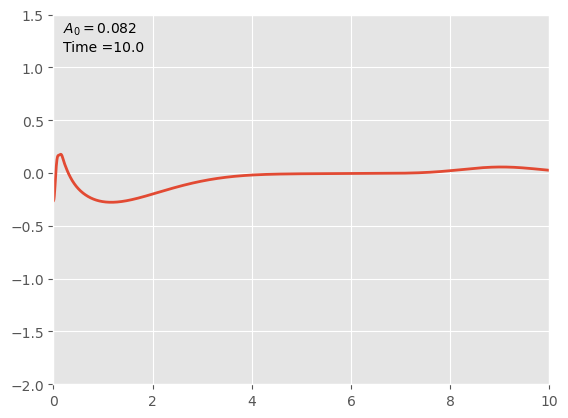

In [ ]:
# Animation plot for Phi: Scalar Field

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())
if A0 > 0.0819:
    anim.save("animation_colapse.mp4")
else:
    anim.save("animation_dispersion.mp4")

